# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Exercise 11

The aim of this exercise is to get used to **machine learning** and to the **Keras** library, expermenting with **regression of functions** on noisy data.

The tests were made on three different kinds of equation: a scalar **linear** function, a scalar **polynomial** function of order 3 and a **trigonometric** 2D function.

The noise was produced adding to the exact value $f(x_i)$ a **Gaussian uncorrelate noise** $\eta_i$ so that $y_i= f(x_i) + \eta_i$.

The NN is first trained on a **training data set** and then tested  on the **validation data set** (usually smaller than the training one).

*Note: I moved the parts of Exercise 11.2 and  11.3 on other files not to make this notebook too long and heavy.*

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

np.random.seed(0)

## Exercise 11.1

The first test was made on the **linear 1D function**
$$
f(x)=2x+1
$$
in the range $[-1, 1]$.

This is a good test to start with: since every neuron carries out **two parameters** (the **weight** $w$ and the **bias** $b$), it can be performed by a NN composed only by **1 neuron**. In this way, we can concentrate our study on some parameters without being bothered by the architecture of the Network.

The parameters I studied in this exercise are:
1. the **number of training data points** $N_{train}$
2. the **number of epochs** $N_{epochs}$
3. the **noise** $\sigma$

I made different test varying one of these parameters and keeping the other two on reasonable values ($N_{train}=500$, $N_{epoch}=30$, $\sigma=0.5$). For all the test in exercise 11.1 I used *SGD* as optimiser and *MSE* as loss and metric (these parameters will be studied later) and I kept $N_{validation}=50$ .



In [4]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

#### 1. Varying $N_{train}$

I tested $N_{train}$ on three different values: $100$, $500$ and $1000$.


In [5]:
#Declaring things
sigma = 0.5 #Gaussian noise
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_valid = np.random.normal(m * x_valid + b, sigma)
y_target = m * x_valid + b # ideal (target) linear function

#Ntrain = 100
x_train100 = np.random.uniform(-1, 1, 100)
y_train100 = np.random.normal(m * x_train100 + b, sigma) # actual measures from which we want to guess regression parameters

model100 = tf.keras.Sequential()
model100.add(Dense(1, input_shape=(1,)))
model100.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model100.summary()

#Ntrain = 500
print()
print ()
print ()
x_train500 = np.random.uniform(-1, 1, 500)
y_train500 = np.random.normal(m * x_train500 + b, sigma) # actual measures from which we want to guess regression parameters

model500 = tf.keras.Sequential()
model500.add(Dense(1, input_shape=(1,)))
model500.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model500.summary()

#Ntrain = 1000
print()
print()
print()
x_train1000 = np.random.uniform(-1, 1, 1000)
y_train1000 = np.random.normal(m * x_train1000 + b, sigma) # actual measures from which we want to guess regression parameters

model1000 = tf.keras.Sequential()
model1000.add(Dense(1, input_shape=(1,)))
model1000.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model1000.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
________________________

In [6]:
#training
history100 = model100.fit(x=x_train100, y=y_train100, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
print()
history500 = model500.fit(x=x_train500, y=y_train500, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
print()
history1000 = model1000.fit(x=x_train1000, y=y_train1000, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

Epoch 1/30
4/4 [==============================] - 1s 50ms/step - loss: 2.3837 - mse: 2.3837 - val_loss: 2.6140 - val_mse: 2.6140
Epoch 2/30
4/4 [==============================] - 0s 7ms/step - loss: 2.2076 - mse: 2.2076 - val_loss: 2.4111 - val_mse: 2.4111
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 2.0337 - mse: 2.0337 - val_loss: 2.1988 - val_mse: 2.1988
Epoch 4/30
4/4 [==============================] - 0s 7ms/step - loss: 1.8518 - mse: 1.8518 - val_loss: 2.0324 - val_mse: 2.0324
Epoch 5/30
4/4 [==============================] - 0s 7ms/step - loss: 1.7095 - mse: 1.7095 - val_loss: 1.8877 - val_mse: 1.8877
Epoch 6/30
4/4 [==============================] - 0s 8ms/step - loss: 1.5865 - mse: 1.5865 - val_loss: 1.7617 - val_mse: 1.7617
Epoch 7/30
4/4 [==============================] - 0s 7ms/step - loss: 1.4777 - mse: 1.4777 - val_loss: 1.6087 - val_mse: 1.6087
Epoch 8/30
4/4 [==============================] - 0s 8ms/step - loss: 1.3496 - mse: 1.3496 - val_loss: 

In [7]:
#Showing some results

print("*****************************************************")
print ("N_train=100")
ws = model100.get_weights()
#print (ws)
print ("WEIGHTS:", "m =", ws[0], "b =", ws [1])
print ("DIFFERENCE FROM REAL PARAMETERS:", "delta m =",  abs(ws[0]-m), "delta b =", abs(ws[1]-b))
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model100.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model100.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("*****************************************************")

print()
print("*****************************************************")
print ("N_train=500")
ws = model500.get_weights()
print ("WEIGHTS:", "m =", ws[0], "b =", ws [1])
print ("DIFFERENCE FROM REAL PARAMETERS:", "delta m =",  abs(ws[0]-m), "delta b =", abs(ws[1]-b))
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model500.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model500.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print("Test accuracy:", score[1])
print("*****************************************************")
print()

print("*****************************************************")
print ("N_train=1000")
ws = model1000.get_weights()
print ("WEIGHTS:", "m =", ws[0], "b =", ws [1])
print ("DIFFERENCE FROM REAL PARAMETERS:", "delta m =",  abs(ws[0]-m), "delta b =", abs(ws[1]-b))
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model1000.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model1000.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("*****************************************************")




*****************************************************
N_train=100
WEIGHTS: m = [[1.0677599]] b = [0.8831694]
DIFFERENCE FROM REAL PARAMETERS: delta m = [[0.9322401]] delta b = [0.11683059]
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.5961176156997681
Test accuracy: 0.5961176156997681
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.2928922176361084
Test accuracy: 0.2928922176361084
*****************************************************

*****************************************************
N_train=500
WEIGHTS: m = [[1.915871]] b = [0.99945664]
DIFFERENCE FROM REAL PARAMETERS: delta m = [[0.08412898]] delta b = [0.00054336]
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.23417656123638153
Test accuracy: 0.23417656123638153
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.002146677114069462
Test accuracy: 0.002146677114069462
*****************************************************

*******************************

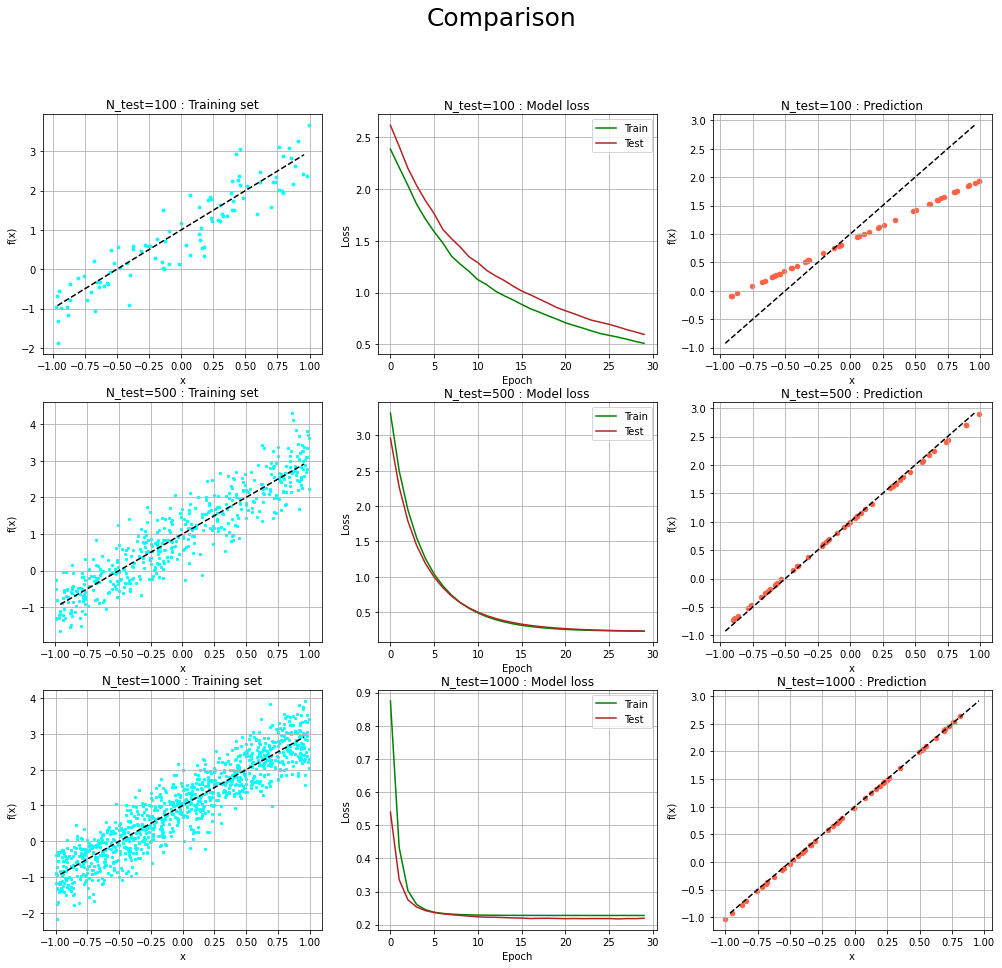

In [8]:
fig = plt.figure (figsize = (17, 15))
plt.suptitle ("Comparison", fontsize=25)

#N=100
plt.subplot (3, 3, 1)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train100, y_train100, color="aqua", s=8)
plt.grid(True)
plt.title ("N_test=100 : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 2)
plt.plot(history100.history['loss'], color="green")
plt.plot(history100.history['val_loss'], color="firebrick")
plt.title('N_test=100 : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 3)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model100.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("N_test=100 : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

#N=500
plt.subplot (3, 3, 4)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train500, y_train500, color="aqua", s=5)
plt.grid(True)
plt.title ("N_test=500 : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 5)
plt.plot(history500.history['loss'], color="green")
plt.plot(history500.history['val_loss'], color="firebrick")
plt.title('N_test=500 : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 6)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model500.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("N_test=500 : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

#N=1000
plt.subplot (3, 3, 7)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train1000, y_train1000, color="aqua", s=5)
plt.grid(True)
plt.title ("N_test=1000 : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 8)
plt.plot(history1000.history['loss'], color="green")
plt.plot(history1000.history['val_loss'], color="firebrick")
plt.title('N_test=1000 : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 9)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model1000.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("N_test=1000 : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")



plt.show()


The graphs show that, as expected, increasing $N_{train}$ makes loss decrease faster.
For $N_{train}=100$, after 30 epochs the loss function derivative is still negative and far from zero, and the line is not fitted well (underfit), while for $N_{train}=500$ and $N_{train}=1000$ the line is fitted well and after 30 epochs the loss function derivative is close to zero. Of course in the last case the curve fit is better and the loss function becomes horizontal faster, but also for $N_{train}=500$ the results are satisfying.

#### 2. Varying $N_{epoch}$

I tested $N_{epoch}$ on three different values: $10$, $30$ and $60$.

In [9]:
#Declaring things
sigma = 0.5 #Gaussian noise
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_valid = np.random.normal(m * x_valid + b, sigma)
y_target = m * x_valid + b # ideal (target) linear function
x_train = np.random.uniform(-1, 1, 500)
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters

#N=10
print()
print()
print()
model10 = tf.keras.Sequential()
model10.add(Dense(1, input_shape=(1,)))
model10.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model10.summary()

#N=30
print()
print()
print()
model30 = tf.keras.Sequential()
model30.add(Dense(1, input_shape=(1,)))
model30.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model30.summary()

#N=60
print()
print()
print()
model60 = tf.keras.Sequential()
model60.add(Dense(1, input_shape=(1,)))
model60.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model60.summary()




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
___________________

In [10]:
#training
history10 = model10.fit(x=x_train, y=y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_valid, y_valid))
print()
history30 = model30.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
print()
history60 = model60.fit(x=x_train, y=y_train, batch_size=32, epochs=60, shuffle=True, validation_data=(x_valid, y_valid))

Epoch 1/10
16/16 [==============================] - 0s 9ms/step - loss: 3.1230 - mse: 3.1230 - val_loss: 1.9249 - val_mse: 1.9249
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 2.4043 - mse: 2.4043 - val_loss: 1.5472 - val_mse: 1.5472
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 1.8971 - mse: 1.8971 - val_loss: 1.2837 - val_mse: 1.2837
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 1.5418 - mse: 1.5418 - val_loss: 1.0854 - val_mse: 1.0854
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 1.2785 - mse: 1.2785 - val_loss: 0.9296 - val_mse: 0.9296
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 1.0772 - mse: 1.0772 - val_loss: 0.8058 - val_mse: 0.8058
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.9191 - mse: 0.9191 - val_loss: 0.7024 - val_mse: 0.7024
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7923 - mse: 0.79

In [11]:
#Showing some results

print("*****************************************************")
print ("N_epochs=10")
ws = model10.get_weights()
print ("WEIGHTS:", "m =", ws[0], "b =", ws [1])
print ("DIFFERENCE FROM REAL PARAMETERS:", "delta m =",  abs(ws[0]-m), "delta b =", abs(ws[1]-b))
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model10.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model10.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("*****************************************************")

print()
print("*****************************************************")
print ("N_epochs=30")
ws = model30.get_weights()
print ("WEIGHTS:", "m =", ws[0], "b =", ws [1])
print ("DIFFERENCE FROM REAL PARAMETERS:", "delta m =",  abs(ws[0]-m), "delta b =", abs(ws[1]-b))
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model30.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model30.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print("Test accuracy:", score[1])
print("*****************************************************")
print()

print("*****************************************************")
print ("N_epochs=60")
ws = model60.get_weights()
print ("WEIGHTS:", "m =", ws[0], "b =", ws [1])
print ("DIFFERENCE FROM REAL PARAMETERS:", "delta m =",  abs(ws[0]-m), "delta b =", abs(ws[1]-b))
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model60.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model60.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("*****************************************************")




*****************************************************
N_epochs=10
WEIGHTS: m = [[1.0008268]] b = [0.9399219]
DIFFERENCE FROM REAL PARAMETERS: delta m = [[0.99917316]] delta b = [0.06007808]
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.493643581867218
Test accuracy: 0.493643581867218
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.28090840578079224
Test accuracy: 0.28090840578079224
*****************************************************

*****************************************************
N_epochs=30
WEIGHTS: m = [[1.9255878]] b = [0.99222183]
DIFFERENCE FROM REAL PARAMETERS: delta m = [[0.07441223]] delta b = [0.00777817]
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.24091845750808716
Test accuracy: 0.24091845750808716
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.001529364031739533
Test accuracy: 0.001529364031739533
*****************************************************

*****************************

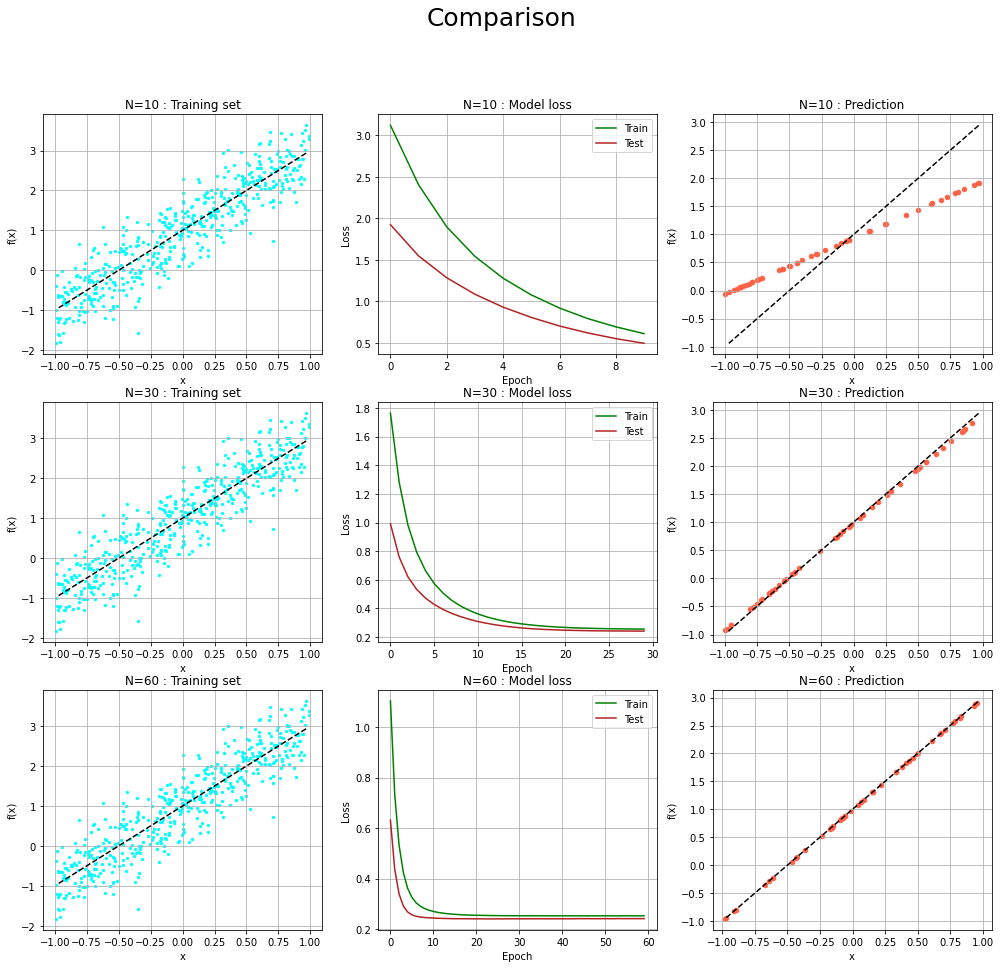

In [12]:
fig = plt.figure (figsize = (17, 15))
plt.suptitle ("Comparison", fontsize=25)

#N=10
plt.subplot (3, 3, 1)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("N=10 : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 2)
plt.plot(history10.history['loss'], color="green")
plt.plot(history10.history['val_loss'], color="firebrick")
plt.title('N=10 : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 3)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model10.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("N=10 : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

#N=500
plt.subplot (3, 3, 4)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("N=30 : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 5)
plt.plot(history30.history['loss'], color="green")
plt.plot(history30.history['val_loss'], color="firebrick")
plt.title('N=30 : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 6)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model30.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("N=30 : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

#N=1000
plt.subplot (3, 3, 7)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train, color="aqua", s=5)
plt.grid(True)
plt.title ("N=60 : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 8)
plt.plot(history60.history['loss'], color="green")
plt.plot(history60.history['val_loss'], color="firebrick")
plt.title('N=60 : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 9)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model60.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("N=60 : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")



plt.show()


From the graphs and the results above, it is visible that $N_{epochs}=10$ is too low and it gets to an underfitting situation similar to the one observed in the previous paragraph.
With $N_{epochs}=30$ the line is fitted very well and the loss function derivative gets close to 0 quite fast.
With $N_{epochs}=60$ we observe a situation of overfitting: the line fit is worse than the previoius one and the loss function derivative gets close to 0 more slowly.


#### 2. Varying $\sigma$

I tested $\sigma$ on three different values: $0$, $0.5$ and $2$.

In [13]:
#Declaring things
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function
x_train = np.random.uniform(-1, 1, 500)

#sigma=0
sigma1 = 0 #Gaussian noise
y_valid1 = np.random.normal(m * x_valid + b, sigma1)
y_train1 = np.random.normal(m * x_train + b, sigma1) # actual measures from which we want to guess regression parameters

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model1.summary()

#sigma=0.5
sigma2 = 0.5 #Gaussian noise
y_valid2 = np.random.normal(m * x_valid + b, sigma2)
y_train2 = np.random.normal(m * x_train + b, sigma2) # actual measures from which we want to guess regression parameters

print()
print()
model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.summary()

#sigma=2
sigma3 = 3 #Gaussian noise
y_valid3 = np.random.normal(m * x_valid + b, sigma3)
y_train3 = np.random.normal(m * x_train + b, sigma3) # actual measures from which we want to guess regression parameters

print()
print()
model3 = tf.keras.Sequential()
model3.add(Dense(1, input_shape=(1,)))
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
________________________

In [14]:
#training
history1 = model1.fit(x=x_train, y=y_train1, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid1))
print()
history2 = model2.fit(x=x_train, y=y_train2, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid2))
print()
history3 = model3.fit(x=x_train, y=y_train3, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid3))

Epoch 1/30
16/16 [==============================] - 0s 8ms/step - loss: 2.8696 - mse: 2.8696 - val_loss: 2.7596 - val_mse: 2.7596
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 2.0561 - mse: 2.0561 - val_loss: 1.9626 - val_mse: 1.9626
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 1.5175 - mse: 1.5175 - val_loss: 1.4258 - val_mse: 1.4258
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 1.1448 - mse: 1.1448 - val_loss: 1.0587 - val_mse: 1.0587
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.8804 - mse: 0.8804 - val_loss: 0.8010 - val_mse: 0.8010
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6850 - mse: 0.6850 - val_loss: 0.6154 - val_mse: 0.6154
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5389 - mse: 0.5389 - val_loss: 0.4761 - val_mse: 0.4761
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4259 - mse: 0.42

In [15]:
#Showing some results

print("*****************************************************")
print ("sigma=0")
ws = model1.get_weights()
print ("WEIGHTS:", "m =", ws[0], "b =", ws [1])
print ("DIFFERENCE FROM REAL PARAMETERS:", "delta m =",  abs(ws[0]-m), "delta b =", abs(ws[1]-b))
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("*****************************************************")

print()
print("*****************************************************")
print ("sigma=0.5")
ws = model2.get_weights()
print ("WEIGHTS:", "m =", ws[0], "b =", ws [1])
print ("DIFFERENCE FROM REAL PARAMETERS:", "delta m =",  abs(ws[0]-m), "delta b =", abs(ws[1]-b))
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model2.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print("Test accuracy:", score[1])
print("*****************************************************")
print()

print("*****************************************************")
print ("sigma=2")
ws = model3.get_weights()
print ("WEIGHTS:", "m =", ws[0], "b =", ws [1])
print ("DIFFERENCE FROM REAL PARAMETERS:", "delta m =",  abs(ws[0]-m), "delta b =", abs(ws[1]-b))
print("PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):")
score = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):")
score = model3.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("*****************************************************")

*****************************************************
sigma=0
WEIGHTS: m = [[1.9118445]] b = [1.0025119]
DIFFERENCE FROM REAL PARAMETERS: delta m = [[0.08815551]] delta b = [0.00251186]
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.7868635058403015
Test accuracy: 0.7868635058403015
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.002515307627618313
Test accuracy: 0.002515307627618313
*****************************************************

*****************************************************
sigma=0.5
WEIGHTS: m = [[1.9517647]] b = [1.0045458]
DIFFERENCE FROM REAL PARAMETERS: delta m = [[0.0482353]] delta b = [0.00454581]
PERFORMANCE EVALUATION (COMPARED WITH VALIDATION CURVE):
Test loss: 0.8031162023544312
Test accuracy: 0.8031162023544312
PERFORMANCE EVALUATION (COMPARED WITH EXACT CURVE):
Test loss: 0.0007209990872070193
Test accuracy: 0.0007209990872070193
*****************************************************

*********************************

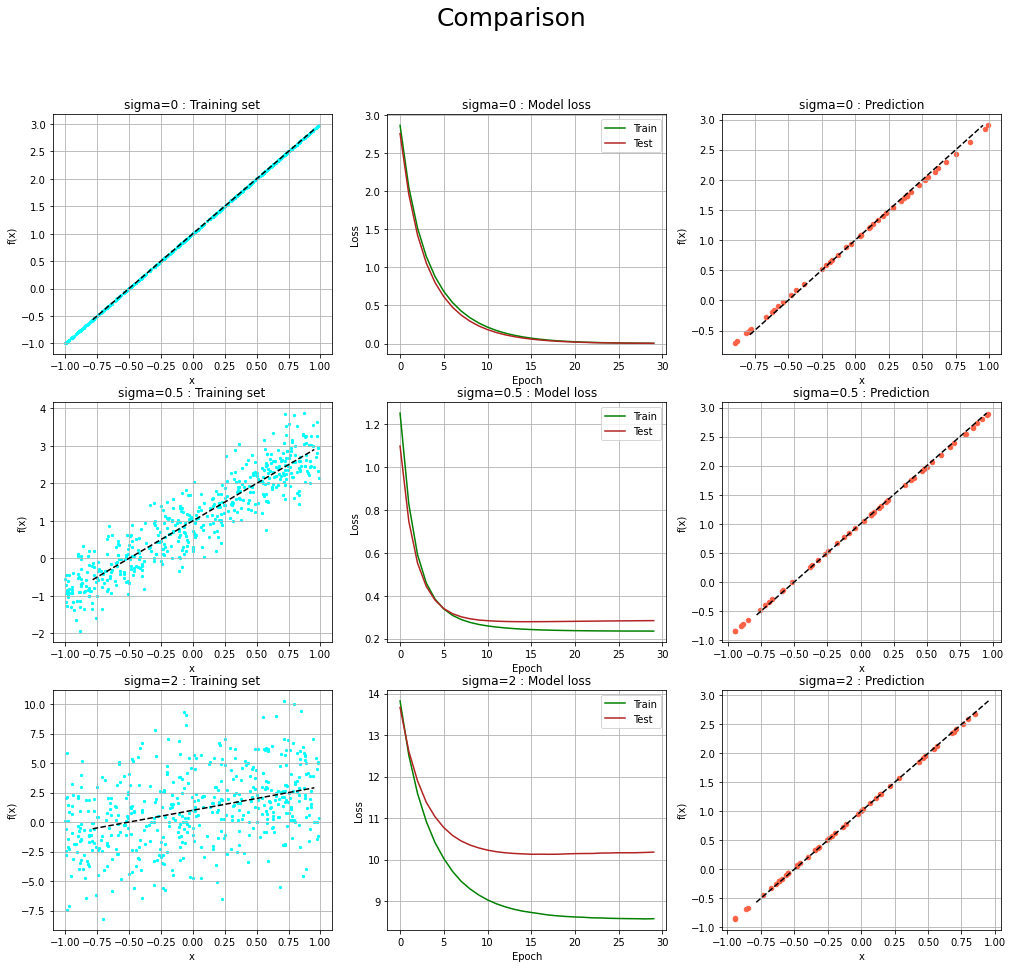

In [16]:
fig = plt.figure (figsize = (17, 15))
plt.suptitle ("Comparison", fontsize=25)

#sigma=0
plt.subplot (3, 3, 1)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train1, color="aqua", s=5)
plt.grid(True)
plt.title ("sigma=0 : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 2)
plt.plot(history1.history['loss'], color="green")
plt.plot(history1.history['val_loss'], color="firebrick")
plt.title('sigma=0 : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 3)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("sigma=0 : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

#sigma=0.5
plt.subplot (3, 3, 4)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train2, color="aqua", s=5)
plt.grid(True)
plt.title ("sigma=0.5 : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 5)
plt.plot(history2.history['loss'], color="green")
plt.plot(history2.history['val_loss'], color="firebrick")
plt.title('sigma=0.5 : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 6)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("sigma=0.5 : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")

#sigma=2
plt.subplot (3, 3, 7)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.scatter(x_train, y_train3, color="aqua", s=5)
plt.grid(True)
plt.title ("sigma=2 : Training set")
plt.xlabel ("x")
plt.ylabel ("f(x)")

plt.subplot (3, 3, 8)
plt.plot(history3.history['loss'], color="green")
plt.plot(history3.history['val_loss'], color="firebrick")
plt.title('sigma=2 : Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.subplot (3, 3, 9)
x_predicted = np.random.uniform(-1, 1, 50)
y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color="tomato", s=20)
plt.plot(x_valid, y_target, linestyle="dashed", color="black")
plt.grid(True)
plt.title ("sigma=2 : Prediction")
plt.xlabel ("x")
plt.ylabel ("f(x)")



plt.show()


The graphs show what was expected: the more the noise, the worse the fit. Because we want to fit functions on noisy data, if we want a little noise which doesn't compromise much the success of the fit, setting $\sigma=0.5$ seems a good choice, while with $\sigma=2$ already compromises the accuracy of the predictions.